In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

585

In [6]:
# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | aklavik
Processing Record 2 of Set 1 | libreville
Processing Record 3 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 4 of Set 1 | mecca
Processing Record 5 of Set 1 | pascagoula
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | nanortalik
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | hovd
Processing Record 11 of Set 1 | puerto escondido
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | bandarbeyla
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | bolungarvik
City not found. Skipping...
Processing Record 16 of Set 1 | olafsvik
Processing Record 17 of Set 1 | matagami
Processing Record 18 of Set 1 | kastamonu
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | dikson
Processing Record 21 of Set 1 | ben

Processing Record 35 of Set 4 | cherskiy
Processing Record 36 of Set 4 | paita
Processing Record 37 of Set 4 | seydi
Processing Record 38 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 39 of Set 4 | naze
Processing Record 40 of Set 4 | amderma
City not found. Skipping...
Processing Record 41 of Set 4 | orocue
Processing Record 42 of Set 4 | pelym
Processing Record 43 of Set 4 | hamilton
Processing Record 44 of Set 4 | pevek
Processing Record 45 of Set 4 | vila
Processing Record 46 of Set 4 | saint anthony
Processing Record 47 of Set 4 | upata
Processing Record 48 of Set 4 | samusu
City not found. Skipping...
Processing Record 49 of Set 4 | hofn
Processing Record 50 of Set 4 | maragogi
Processing Record 1 of Set 5 | cabo san lucas
Processing Record 2 of Set 5 | elko
Processing Record 3 of Set 5 | nikolskoye
Processing Record 4 of Set 5 | yandoon
City not found. Skipping...
Processing Record 5 of Set 5 | uporovo
Processing Record 6 of Set 5 | sao filipe
Process

Processing Record 29 of Set 8 | kununurra
Processing Record 30 of Set 8 | berbera
Processing Record 31 of Set 8 | bria
Processing Record 32 of Set 8 | leiyang
Processing Record 33 of Set 8 | xichang
Processing Record 34 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 35 of Set 8 | trairi
Processing Record 36 of Set 8 | iralaya
Processing Record 37 of Set 8 | mackay
Processing Record 38 of Set 8 | manga
Processing Record 39 of Set 8 | casino
Processing Record 40 of Set 8 | miri
Processing Record 41 of Set 8 | puerto del rosario
Processing Record 42 of Set 8 | hambantota
Processing Record 43 of Set 8 | santa isabel do rio negro
Processing Record 44 of Set 8 | wanning
Processing Record 45 of Set 8 | diamantino
Processing Record 46 of Set 8 | mapiripan
Processing Record 47 of Set 8 | christchurch
Processing Record 48 of Set 8 | poum
Processing Record 49 of Set 8 | yarmouth
Processing Record 50 of Set 8 | kichera
Processing Record 1 of Set 9 | tucumcari
Processing Recor

Processing Record 18 of Set 12 | mirnyy
Processing Record 19 of Set 12 | eyl
Processing Record 20 of Set 12 | isugod
Processing Record 21 of Set 12 | nosy varika
Processing Record 22 of Set 12 | synya
Processing Record 23 of Set 12 | conceicao do araguaia
Processing Record 24 of Set 12 | brokopondo
Processing Record 25 of Set 12 | sorland
Processing Record 26 of Set 12 | bukachacha
Processing Record 27 of Set 12 | pacific grove
Processing Record 28 of Set 12 | karakol
Processing Record 29 of Set 12 | urucui
Processing Record 30 of Set 12 | maldonado
Processing Record 31 of Set 12 | tombouctou
Processing Record 32 of Set 12 | tobol
Processing Record 33 of Set 12 | isla mujeres
Processing Record 34 of Set 12 | palana
Processing Record 35 of Set 12 | gadsden
-----------------------------
Data Retrieval Complete      
-----------------------------


In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Aklavik,68.2191,-135.0107,4.03,85,75,4.61,CA,2021-11-20 19:49:28
1,Libreville,0.3925,9.4537,75.22,94,20,4.61,GA,2021-11-20 19:49:29
2,Mecca,21.4267,39.8261,74.73,54,40,5.48,SA,2021-11-20 19:49:30
3,Pascagoula,30.3658,-88.5561,74.05,66,1,8.05,US,2021-11-20 19:49:30
4,Cape Town,-33.9258,18.4232,68.11,60,20,13.80,ZA,2021-11-20 19:46:31
5,Nanortalik,60.1432,-45.2371,37.81,99,100,8.25,GL,2021-11-20 19:48:29
6,Ushuaia,-54.8000,-68.3000,38.86,70,75,36.82,AR,2021-11-20 19:49:32
7,Hovd,48.0056,91.6419,6.58,38,0,1.43,MN,2021-11-20 19:49:32
8,Puerto Escondido,15.8500,-97.0667,86.32,58,0,5.91,MX,2021-11-20 19:49:33
9,Albany,42.6001,-73.9662,45.09,55,100,1.99,US,2021-11-20 19:44:50


In [9]:
#Reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Aklavik,CA,2021-11-20 19:49:28,68.2191,-135.0107,4.03,85,75,4.61
1,Libreville,GA,2021-11-20 19:49:29,0.3925,9.4537,75.22,94,20,4.61
2,Mecca,SA,2021-11-20 19:49:30,21.4267,39.8261,74.73,54,40,5.48
3,Pascagoula,US,2021-11-20 19:49:30,30.3658,-88.5561,74.05,66,1,8.05
4,Cape Town,ZA,2021-11-20 19:46:31,-33.9258,18.4232,68.11,60,20,13.80
5,Nanortalik,GL,2021-11-20 19:48:29,60.1432,-45.2371,37.81,99,100,8.25
6,Ushuaia,AR,2021-11-20 19:49:32,-54.8000,-68.3000,38.86,70,75,36.82
7,Hovd,MN,2021-11-20 19:49:32,48.0056,91.6419,6.58,38,0,1.43
8,Puerto Escondido,MX,2021-11-20 19:49:33,15.8500,-97.0667,86.32,58,0,5.91
9,Albany,US,2021-11-20 19:44:50,42.6001,-73.9662,45.09,55,100,1.99


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

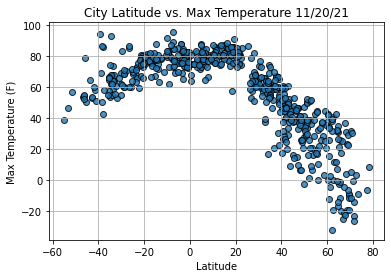

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

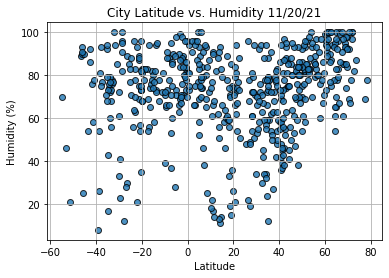

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

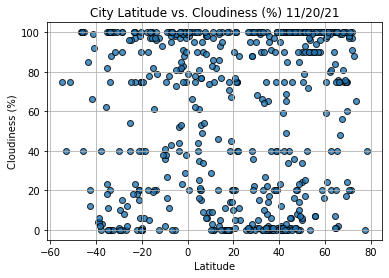

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

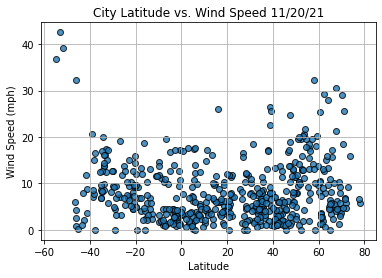

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Import linregress
    from scipy.stats import linregress

# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data.
    def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

        # Run regression on hemisphere weather data.
        (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
        # Calculate the regression line "y values" from the slope and intercept.
        regress_values = slope * x_values + intercept
        # Get the equation of the line.
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

        # Create a scatter plot and plot the regression line.
        plt.scatter(x_values,y_values)
        plt.plot(x_values,regress_values,"r")
        # Annotate the text for the line equation.
        plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
        plt.title(title)
        plt.xlabel('Latitude')
        plt.ylabel(y_label)
        plt.show()

In [17]:
index13 = city_data_df.loc[13]
index13

City                     Matagami
Country                        CA
Date          2021-11-20 19:49:35
Lat                       49.7502
Lng                      -77.6328
Max Temp                    33.91
Humidity                       86
Cloudiness                     90
Wind Speed                   11.5
Name: 13, dtype: object

In [18]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4      False
       ...  
538     True
539     True
540     True
541     True
542     True
Name: Lat, Length: 543, dtype: bool

In [19]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Aklavik,CA,2021-11-20 19:49:28,68.2191,-135.0107,4.03,85,75,4.61
1,Libreville,GA,2021-11-20 19:49:29,0.3925,9.4537,75.22,94,20,4.61
2,Mecca,SA,2021-11-20 19:49:30,21.4267,39.8261,74.73,54,40,5.48
3,Pascagoula,US,2021-11-20 19:49:30,30.3658,-88.5561,74.05,66,1,8.05
5,Nanortalik,GL,2021-11-20 19:48:29,60.1432,-45.2371,37.81,99,100,8.25


In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))


In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))